In [26]:
import pandas as pd

# traditional_data = pd.read_csv('./Traditional_cluster_10000/Trad_64_cluster/Outputs/Trad_64_cluster_GRU_64_outputs.csv', on_bad_lines='skip')
traditional_data = pd.read_csv('./Traditional_Epoch10000_GRU_N64_lr1e-4_GRU_64_outputs.csv', on_bad_lines='skip')

adaptive_data = pd.read_csv('./Adaptive_cluster_10000/Adapt_64_cluster/Outputs/Adapt_64_cluster_GRU_64_outputs.csv',on_bad_lines='skip')

/var/folders/qp/wmpntt8n0yxckr9vks3kb7yr0000gp/T/ipykernel_70038/2120239679.py:59: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle='--', alpha=0.6)


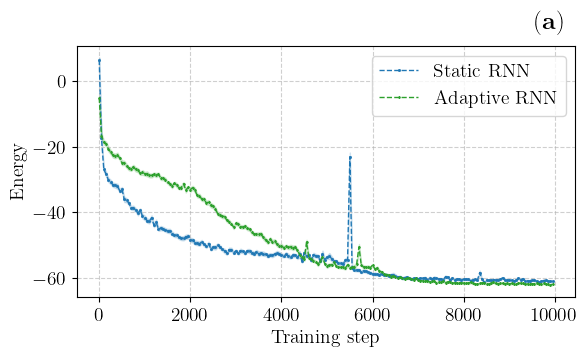

In [32]:
import matplotlib.pyplot as plt
import numpy as np

step = 50

index1 = traditional_data['Unnamed: 0'][::step]
energy1 = traditional_data['Energies'].apply(lambda x: complex(x).real)[::step]
variation1 = traditional_data['Variations'][::step]

index2 = adaptive_data['Unnamed: 0'][::step]
energy2 = adaptive_data['Energies'].apply(lambda x: complex(x).real)[::step]
variation2 = pd.to_numeric(adaptive_data['Variations'])[::step]

num_samples = 100
error1 = np.sqrt(variation1 / num_samples)
error2 = np.sqrt(variation2 / num_samples)

golden_ratio = (1 + np.sqrt(5)) / 2
fig_width = 6
fig_height = fig_width / golden_ratio

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(fig_width, fig_height))

# plt.errorbar(
#     index1, energy1, yerr=error1,
#     fmt='o', label='Static RNN',
#     color='tab:blue', ecolor='tab:blue', alpha=0.5,
#     capsize=3, markersize=4,
#     linestyle='--', linewidth=1, elinewidth=1
# )

# plt.errorbar(
#     index2, energy2, yerr=error2,
#     fmt='s', label='Adaptive RNN',
#     color='tab:green', ecolor='tab:green', alpha=0.5,
#     capsize=3, markersize=4,
#     linestyle='--', linewidth=1, elinewidth=1
# )
plt.plot(index1, energy1, 's--', color='tab:blue', linewidth=1, markersize = 1, label='Static RNN')
plt.fill_between(
    index1, energy1 - error1, energy1 + error1,
    color='tab:blue', alpha=0.2  # transparent shading
)

# Adaptive RNN
plt.plot(index2, energy2, 'd--', color='tab:green', linewidth=1, markersize = 1, label='Adaptive RNN')
plt.fill_between(
    index2, energy2 - error2, energy2 + error2,
    color='tab:green', alpha=0.2
)



plt.xlabel('Training step', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.legend(fontsize = 14)
plt.grid(False, linestyle='--', alpha=0.6)

fig.suptitle(r'$\mathbf{(a)}$', fontsize=18, x=0.9, y=0.95, ha='left')

plt.tight_layout()
fig.savefig("./Cluster_N64_energy.pdf")
plt.show()

NameError: name 'Line2D' is not defined

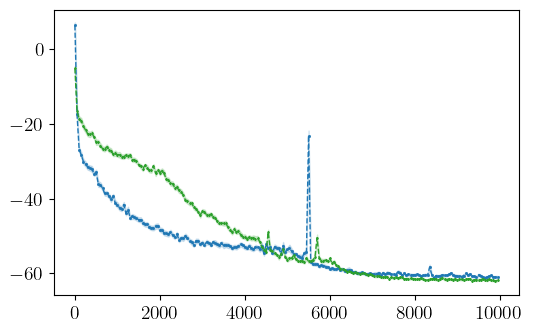

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Main plot
ax.plot(index1, energy1, 's--', color='tab:blue', linewidth=1, markersize=1, label='Static RNN')
ax.fill_between(index1, energy1 - error1, energy1 + error1, color='tab:blue', alpha=0.2)

ax.plot(index2, energy2, 'd--', color='tab:green', linewidth=1, markersize=1, label='Adaptive RNN')
ax.fill_between(index2, energy2 - error2, energy2 + error2, color='tab:green', alpha=0.2)

custom_legend = [
    Line2D([0], [0], color='tab:blue', linestyle='--', marker='s', markersize=8, label='Static RNN'),
    Line2D([0], [0], color='tab:green', linestyle='--', marker='d', markersize=8, label='Adaptive RNN')
]

ax.set_xlabel('Training step', fontsize=14)
ax.set_ylabel('Energy', fontsize=14)
ax.legend(handles=custom_legend, fontsize=13)
# ax.grid(True, linestyle='--', alpha=0.6)

# Inset plot
axins = inset_axes(ax, width="40%", height="40%", loc='right', borderpad=1.3)

# Last 200 points
inset_slice = -1500//50
axins.plot(index1[inset_slice:], energy1[inset_slice:], 's', color='tab:blue', markersize=5)
axins.fill_between(index1[inset_slice:], energy1[inset_slice:] - error1[inset_slice:], energy1[inset_slice:] + error1[inset_slice:], color='tab:blue', alpha=0.2)

axins.plot(index2[inset_slice:], energy2[inset_slice:], 'd', color='tab:green', markersize=5)
axins.fill_between(index2[inset_slice:], energy2[inset_slice:] - error2[inset_slice:], energy2[inset_slice:] + error2[inset_slice:], color='tab:green', alpha=0.2)

# axins.set_xticks([])
# axins.set_yticks([])
# axins.set_title(r'\textbf{Last 1000 steps}', fontsize=10)

fig.suptitle(r'$\mathbf{(b)}$', fontsize=18, x=0.92, y=0.95, ha='left')

plt.tight_layout()
fig.savefig("./Cluster_N64_energy.pdf")
plt.show()


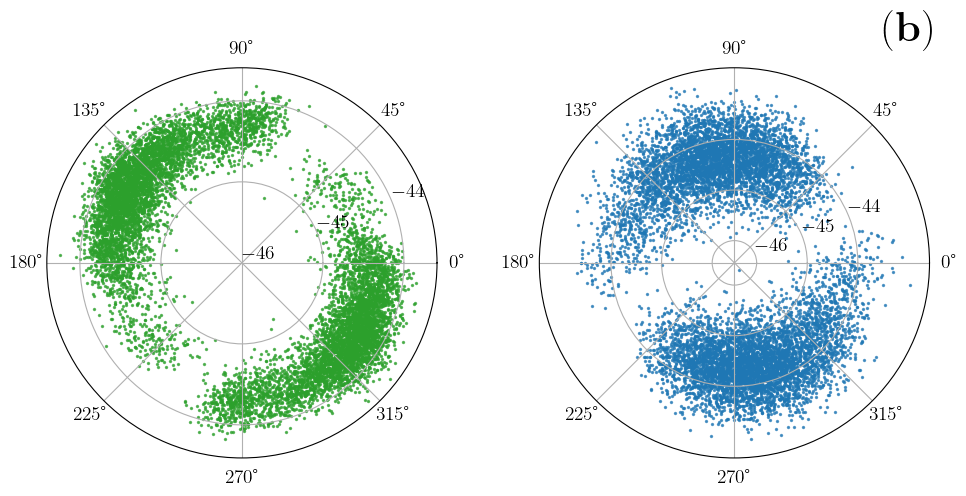

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
adapt_data = np.load('./log_psi_adapt_64.npy')
# trad_data = np.load('./log_psi_trad_64.npy')
trad_data = np.load('./log_psi_trad_64_lr1e-4.npy')


radius_adapt = 2*np.real(adapt_data)
angle_adapt = np.imag(adapt_data)

radius_trad = 2*np.real(trad_data)
angle_trad = np.imag(trad_data)

# Plotting
# Create side-by-side polar plots for the two datasets with legend
plt.rcParams.update({
    "text.usetex": True,             # Enable LaTeX
    "font.family": "serif",          # Use serif font for LaTeX
    "xtick.labelsize": 14,  # Not used in polar directly, so manual setting needed
    "ytick.labelsize": 14
})
fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(10, 5))

# Plot Adapt data on the left
adapt_plot = axs[0].scatter(angle_adapt, radius_adapt, s=2, alpha=0.7, color='tab:green', label='Adaptive RNN')
# axs[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize = 14)
radial_ticks = np.arange(-46, -43, 1)
axs[0].set_yticks(radial_ticks)

# Plot Trad data on the right
trad_plot = axs[1].scatter(angle_trad, radius_trad, s=2, alpha=0.7, color='tab:blue', label='Static RNN')
# axs[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize = 14)

radial_ticks = np.arange(-46, -43, 1)
axs[1].set_yticks(radial_ticks)

fig.suptitle(r'$\mathbf{(b)}$', fontsize=30, x=0.9, y=0.95, ha='left')

plt.tight_layout()
fig.savefig("./Cluster_N64_phase.pdf")

plt.show()

In [24]:
adapt_nrgdata = np.load('./final_data_adapt64.npy')

In [25]:
adapt_nrgdata

array([-6.18626922e+01+0.02214569j,  5.88657136e+00+0.j        ,
        2.42622574e-02+0.j        ])